In [1]:
import numpy as np
import matplotlib.pyplot as plt
from penrose import Penrose_gen
from BdG import BdG, make_H_kin, correlations, n_avg, fermi, occupation_number
from magnetic_field import *

# Generation of penrose tiling

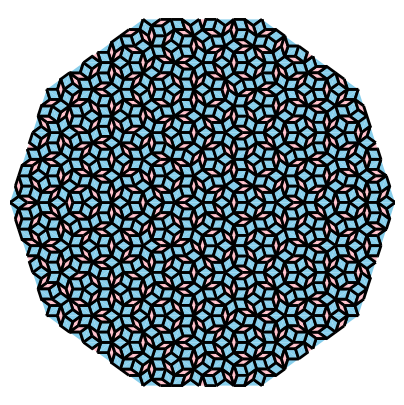

In [4]:
gen = 6

points, triangles = Penrose_gen(gen, plot_tiling = True) 
#points is a list of coordinates of tyles (x, y); 
#triangles is a list of triangles properties (color, a, b, c), where a, b, c are tuples of coordinates of triangle vertices

In [5]:
list_of_nbrs = []
ri = np.array(points)
N = ri.shape[0]
rij = np.array([[rii - rij for rii in ri] for rij in ri])
mrij = np.linalg.norm(rij, axis = -1)
mrij = np.round(mrij, 3)
a = np.unique(mrij)[2]
rij = rij / a
ri = ri / a
nbrs = list(zip(*np.where(mrij == np.unique(mrij)[2])))
list_of_nbrs = [[] for i in range(N)]

for pair in nbrs:
    i, j = pair
    list_of_nbrs[i].append(j)

# Magnetic field properties

In [7]:
# Vector potential 
Ai = np.zeros((N,2))
for i in range(N):
    x, y = ri[i]
    Ai[i] = [-y, 0]

In [8]:
# Vector potential on the ij - link
A0 = np.zeros((N,N,2))
for i in range(N):
    for j in list_of_nbrs[i]:
        A0[i, j] = (Ai[i] + Ai[j]) / 2

In [9]:
nv = 3.2
flux = 2 * np.pi / N
B = flux * nv
Ac = A0 * B

# Setting constants

In [11]:
t = 1.0
g = 2.0 * t
mu = -2.0 * t
T = 0
init_delta = np.exp(1j * np.random.sample(N) * 2 * np.pi)
m = phase_mtx(N, Ac, rij, list_of_nbrs)
M = make_H_kin(N, list_of_nbrs, t)

# Calculations

In [15]:
alpha=0.3
u, v, delta, E, deltas = BdG(M, N, list_of_nbrs, mu, g, t, init_delta, m, alpha)

1.6291983213098638
0.09671097077993736
0.03255316462012768
0.01583701364114152
0.012882418934025315
0.01216266208065385
0.010942915005894472
0.009501051596310386
0.008137551180133065
0.006958700625134526
0.005969436513356999
0.005143480015383167
0.004451463940849677
0.003868413494052987
0.003374488236515692
0.002954119783041807
0.0025950081443992857
0.0022873038905555495
0.0020230013279589733
0.0017955016254856027
0.0015993001574415664
0.0014297613668227708
0.0012829544307940467
0.0011555309948872283
0.0010446320275616086
0.0009478148888009759
0.0008629945099330588
0.0007883945401261521
0.0007225056954573036
0.0006640495188900367
0.0006119464310458814
0.000565287394873705
0.0005233087881478727
0.0004853702237258072
0.00045093511995235585
0.00041955383658935094
0.00039084918100414383
0.00036450407249519505
0.0003402511396536351
0.0003178640210008148
0.000297150143528775
0.0002779447658471166
0.0002601060901698861
0.00024351126806797309
0.00022805314676558572
0.00021363762429119627
0.000

In [23]:
import pickle
import os

folder_name = f"gen={gen}"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
file_name = f"gen={gen}/T={T}_g={g}_mu={mu}_nv={nv}"
file_list = [u, v, delta, E]
with open(file_name, "wb") as file:
    pickle.dump(file_list, file)

# Delta evolution

In [46]:
import imageio

C:\Users\user\AppData\Local\Temp\ipykernel_7252\2083674101.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


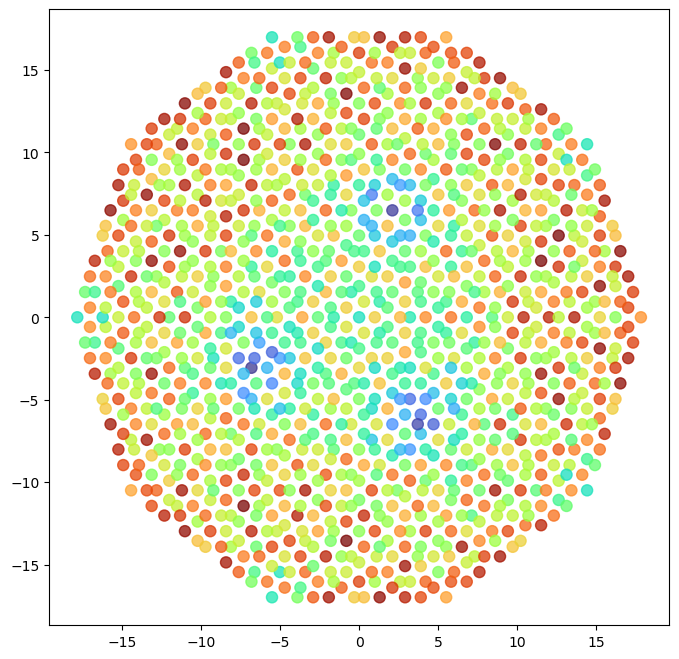

In [48]:
fig, ax = plt.subplots(figsize = (8,8))
frames = []
num_frame = len(deltas)

# Генерация кадров
for i in range(num_frame):
    ax.clear()  # Очищаем оси
    ax.scatter(*ri.T, c=abs(deltas[i]), cmap = 'turbo', zorder = 1, s = 64, alpha = 0.75, vmin = 0)
    filename = f"frame_{i:03d}.png"
    plt.savefig(filename)
    frames.append(imageio.imread(filename))

# Создаем GIF из кадров
imageio.mimsave('delta_evolution.gif', frames, duration=0.2)

for i in range(num_frame):
    filename = f"frame_{i:03d}.png"
    os.remove(filename)